In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Read dataset 
df_full = pd.read_csv('pisa2012.csv', encoding='latin-1')

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Read column descriptions
df_columns = pd.read_csv('pisadict2012_columns.csv', encoding='latin-1')

In [4]:
# Create a sample of 1000 to use to quicken analysis
df_sample = df_full.sample(n = 1000)

# Introduction

This project, part of my Udacity Nanodegree, is designed to showcase my ability to create visualisations using python. I have made use of the Matplotlib and Seaborn libraries. 

For this project I have decided to create visualisations using the PISA dataset. The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development in member and non-member nations intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading.

I have broken the project down into 3 sections, univariate analysis, bivariate analysis and multivariate analysis. Each subsequent slide, apart from the title slides, will pose a question, the python coded graph, and then a short written statement about the graph. Clicking on the graph will show the python code being used.

After reading through the possible column headers I decided to explore the varibales that were of most interest to me. Truancy and tardiness, which is a huge pet peeve of mine. The amount of parents at home, which is something I've always been curious about and whether or not having an older sister was beneficial to my education. 

On the PISA homepage it's stated that the most useful columns for comparing the reading scores, mathematics scores and science scores are PV1MATH, PV1SCIE and PV1READ. 

### Univariate Analysis

To start the analysis I wanted to investigate the truancy variable (ST08Q01) "Late for School". It has options such as "None" which represents a student has never been late for school, "One or Two Times", "Three or Four Times" and "Five Times or More". 

In [5]:
# Check values of each answer
df_full['ST09Q01'].value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: ST09Q01, dtype: int64

In [6]:
# Create index
df_full['ST09Q01'].value_counts().index

Index(['None  ', 'One or two times  ', 'Three or four times  ',
       'Five or more times  '],
      dtype='object')

In [7]:
# Count the amount of null values
df_full['ST09Q01'].isnull().sum();

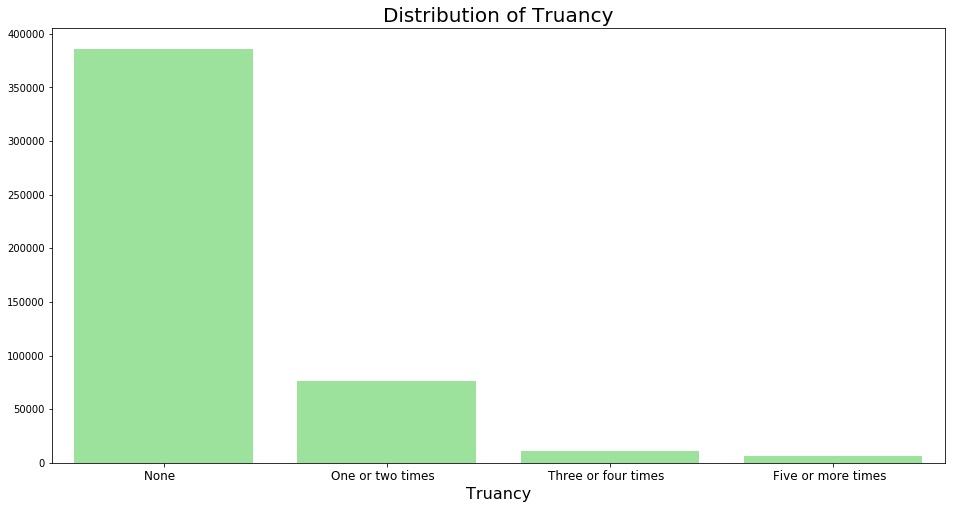

In [8]:
# Plot bar graph showing the distribution
plt.figure(figsize=(16,8))
sb.countplot(data = df_full, x = 'ST09Q01', order = df_full['ST09Q01'].value_counts().index,
            color = 'lightgreen', )
plt.xlabel('Truancy', fontsize = 16)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.title('Distribution of Truancy', fontsize = 20);

**Analysis:**

By plotting the counts of each answer from the truancy question (ST09Q01) we can see that most children, almost 400,000 have never been late. At less than 50,000, there is also very little difference in the amount of children that have been late between 3 or 4 times and 5+ times. What were these amounts as percentages though? 



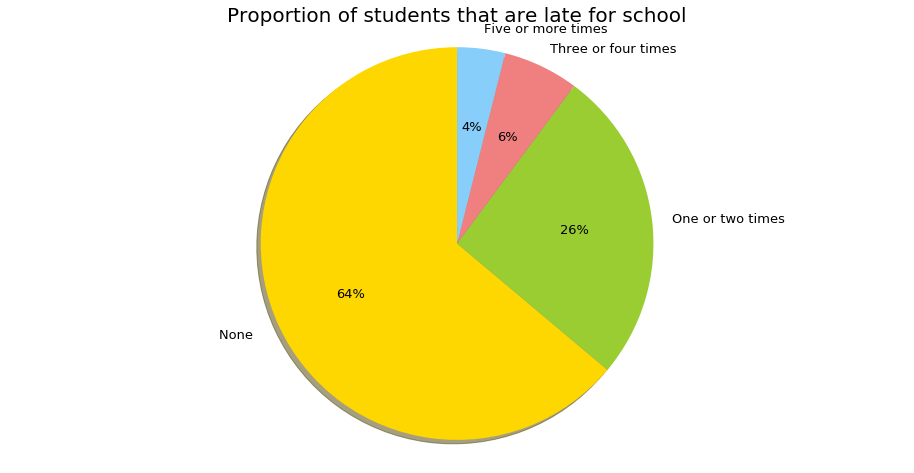

In [9]:
#Plot pie chart showing the percentages
labels = df_full['ST08Q01'].value_counts().index
sizes = df_full['ST08Q01'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.0, 0.0, 0.0, 0.0)  # explode 1st slice
plt.rcParams['font.size'] = 13.0
# Plot
plt.figure(figsize=(16,8))
plt.title('Proportion of students that are late for school', fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show();

**Analysis:**

Similar to the first section we can see that most children, almost two thirds, have never been late to school. Roughly a quarter of children have been late one of two times and 10 percent of children have been late more than twice. 

Onto the second variable of interest the amount of parents at home. This was calculated by mapping the boolean expressions in columns "At Home - Mother" and "At Home - Father" into 1's and 0's then summing the columns into a engineered column "Parents_At_Home". 

As a caveat I would like to add that my new engineered column is a representation of biological parents at home.

In [10]:
# Answers for ST11Q01
df_full['ST11Q01'].value_counts()

Yes    433007
No      27552
Name: ST11Q01, dtype: int64

In [11]:
# Amount of null values in ST11Q01
df_full['ST11Q01'].isnull().sum()

24931

In [12]:
# Answers for ST11Q02
df_full['ST11Q02'].value_counts()

Yes    372161
No      68875
Name: ST11Q02, dtype: int64

In [13]:
# Amount of null values in ST11Q02
df_full['ST11Q02'].isnull().sum()

44454

In [14]:
# Dropping all null values in both columns
df_full_q2 = df_full.dropna(subset=['ST11Q02', 'ST11Q01'])

In [15]:
# Checking there's no null values left
df_full_q2['ST11Q01'].isnull().sum()

0

In [16]:
# Map Yes and No into integer values
df_full_q2['ST11Q01'] = pd.Series(np.where(df_full_q2.ST11Q01.values == 'Yes', 1, 0),
                        df_full_q2.index)

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Map Yes and No into integer values
df_full_q2['ST11Q02'] = pd.Series(np.where(df_full_q2.ST11Q02.values == 'Yes', 1, 0),
                        df_full_q2.index)

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Engineer new column 
df_full_q2['parents_at_home'] = df_full_q2['ST11Q01'] + df_full_q2['ST11Q02']

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Check new column values
df_full_q2.head(1)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,parents_at_home
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,2


In [20]:
# Show values in new column
df_full_q2['parents_at_home'].value_counts()

2    360003
1     58264
0     18633
Name: parents_at_home, dtype: int64

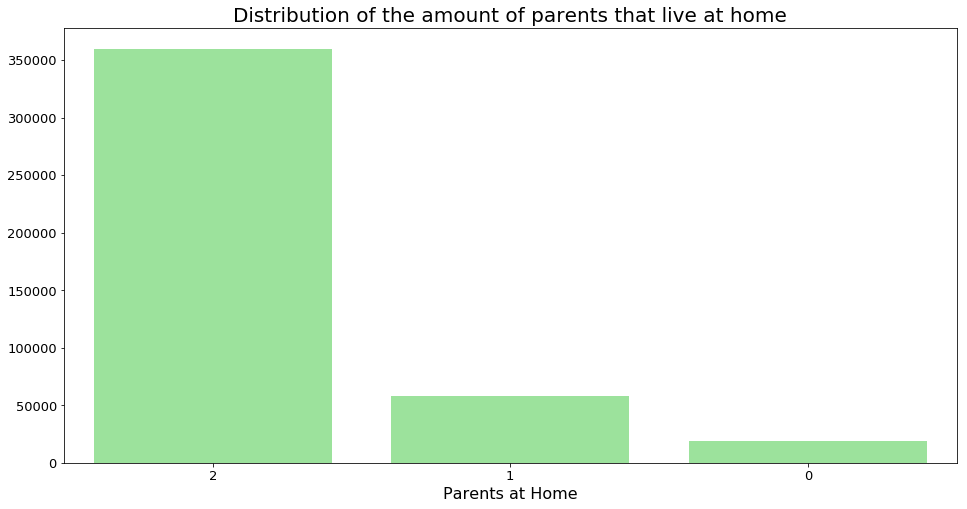

In [21]:
# Plot bar chart showing the amount of parents at home each child has
plt.figure(figsize=(16,8))
sb.countplot(data = df_full_q2, x = 'parents_at_home', order = df_full_q2['parents_at_home'].value_counts().index, color = 'lightgreen')

plt.xlabel('Parents at Home', fontsize = 16)
plt.ylabel('')
plt.title('Distribution of the amount of parents that live at home', fontsize = 20);

**Analysis:**

We can clearly see that the majority of students have both parents living at home. A much smaller amount of students have 1 parent living at home and having 0 parents at home is the least common. It would be more beneficial to see these as percentages though.


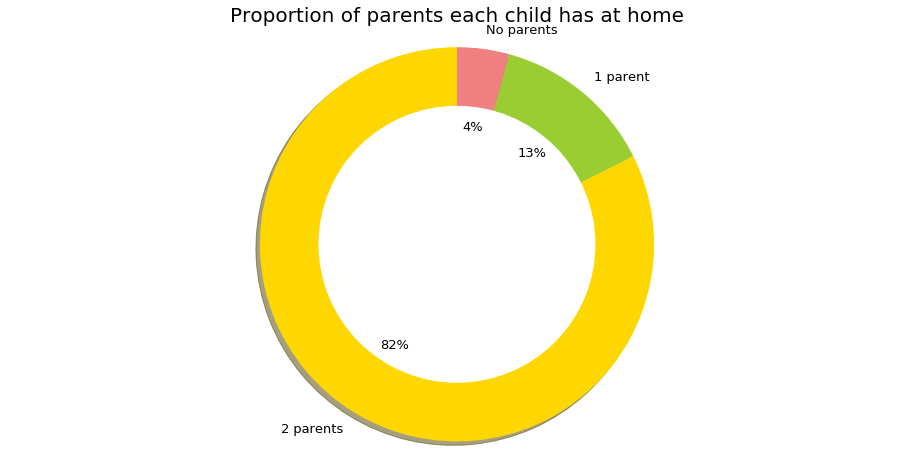

In [22]:
#Plot pie chart showing the percentages
labels = '2 parents', '1 parent', 'No parents'
sizes = df_full_q2['parents_at_home'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.0, 0.0, 0.0)  
my_circle=plt.Circle( (0,0), 0.7, color='white') 


# Plot
plt.figure(figsize=(16,8))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Proportion of parents each child has at home', fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90, )

plt.axis('equal')
plt.show();

We can now see that over 80% of children have both biological parents at home. Over twenty times less than that have no biological parents at home. 

Now that we have taken a look at the first two nominal variables let's take a look at what amount of children have siblings. 

In [23]:
# Create loop to iterate through brothers and sisters column and add 1's and 0's 
# to siblings list

siblings = []

for i in range(df_full.shape[0]):
    if df_full['ST11Q03'][i] == "Yes":
        siblings.append(1)
    elif df_full['ST11Q04'][i] == "Yes":
        siblings.append(1)
    else: 
        siblings.append(0)

In [24]:
# Add siblings list to dataframe
df_full['siblings'] = siblings

In [25]:
# Create new dataframes that will be used in the bivariate analysis
siblings = ['1']
nosiblings = ['0']
df_w_siblings = df_full.loc[df_full['siblings'].isin(siblings)]
df_wo_siblings = df_full.loc[df_full['siblings'].isin(nosiblings)]

In [26]:
# View counts of values
df_full['siblings'].value_counts()

1    357633
0    127857
Name: siblings, dtype: int64

In [27]:
# Calculate percentages of values in column
sibling_percentages = df_full['siblings'].value_counts().div(len(df_full['siblings']))
sibling_percentages

1    0.736643
0    0.263357
Name: siblings, dtype: float64

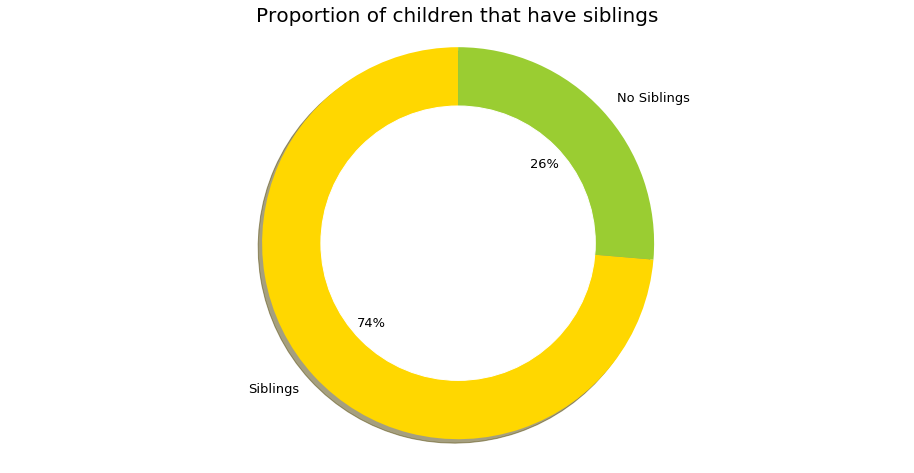

In [29]:
# Assign variables for pie chart
labels = 'Siblings', 'No Siblings',
sizes = df_full['siblings'].value_counts()
colors = ['gold', 'yellowgreen']
explode = (0.0, 0.0)  

# Create empty circle 
my_circle=plt.Circle( (0,0), 0.7, color='white') 


# Create Figure
plt.figure(figsize=(16,8))

# Add white circle on top of figure
p=plt.gcf()
p.gca().add_artist(my_circle)

# Plot Pie Chart using assigned variables
plt.title('Proportion of children that have siblings', fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90, )

plt.axis('equal')
plt.show();

Now it's clear that 74% of students have siblings and 26% of children are only childs. 

The final part of our univariate analysis should be to check that the scores for reading, mathematics and science are all unimodally distributed. This will help us determine whether we need to make any axis transformations to normalise the data. 

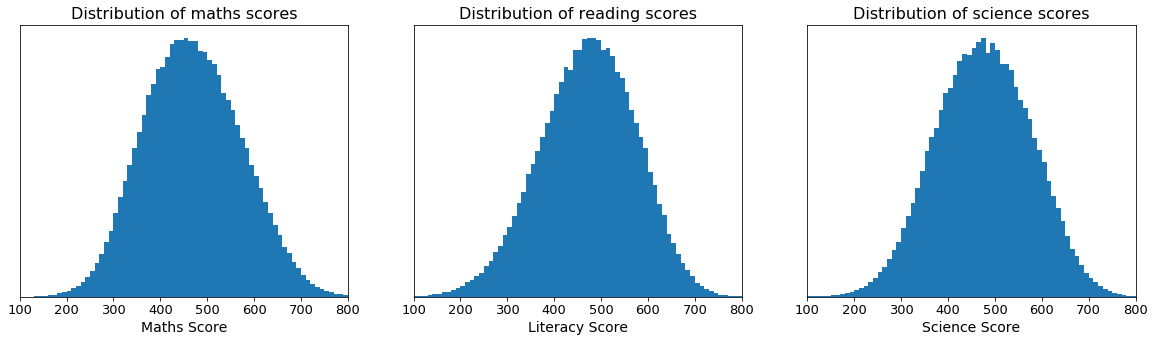

In [30]:
# Create figure
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.title('Distribution of scores')

# left plot: histogram for maths score
# subplot size
plt.subplot(1, 3, 1)
# create bins
bin_edges_1 = np.arange(0, df_sample['PV1MATH'].max()+50, 10)
# choose plot type and select data
plt.hist(data = df_full, x = 'PV1MATH', bins = bin_edges_1)
# create xlabel
plt.xlabel('Maths Score', fontsize=14)
# remove y axis 
plt.yticks([])
# set x axis limits
plt.xlim((100, 800)) 
# set title
plt.title('Distribution of maths scores', fontsize=16);

# middle plot: histogram for reading score
plt.subplot(1, 3, 2)
bin_edges_2 = np.arange(0, df_sample['PV1READ'].max()+50, 10)
plt.hist(data = df_full, x = 'PV1READ', bins = bin_edges_2)
plt.xlabel('Literacy Score', fontsize=14)
plt.yticks([])
plt.xlim((100, 800))
plt.title('Distribution of reading scores', fontsize=16);

# right plot: histogram for science score
plt.subplot(1, 3, 3)
bin_edges_3 = np.arange(0, df_sample['PV1SCIE'].max()+10, 10)
plt.hist(data = df_full, x = 'PV1SCIE', bins = bin_edges_3)
plt.xlabel('Science Score', fontsize=14)
plt.yticks([])
plt.xlim((100, 800))
plt.title('Distribution of science scores', fontsize=16);

**Analysis:**

The distributions for the scores of maths, literacy and science are all unimodal. They all have maxima just below 500 approximataely and whilst maths and science scores show no real skew, the literacy scores seem to be slightly left skewed. 

Also the science scores seem to abruptly end at 750 which might be due to a restriction of the test. 

### Bivariate Analysis

Now that we have explored our univariates, let's move on to see how they change when visualised against each other. 

From a young age I was always taught that being on time was a sign of respect to the other party but were other parents as diligent? Does having more biological parents at home increase a childs chances of not being late?

In [31]:
# Create subsets of parents at home column
bar0_subset = df_full_q2.query('parents_at_home == 0')
bar1_subset = df_full_q2.query('parents_at_home == 1')
bar2_subset = df_full_q2.query('parents_at_home == 2')

In [32]:
# Drop all non values in tardiness column in each dataset
bar0_subset = bar0_subset.dropna(subset=['ST08Q01'])
bar1_subset = bar1_subset.dropna(subset=['ST08Q01'])
bar2_subset = bar2_subset.dropna(subset=['ST08Q01'])

In [33]:
# Calculate percentages of values in subset
bar0_percentages = bar0_subset['ST08Q01'].value_counts().div(len(bar0_subset['ST08Q01']))

In [34]:
# Calculate percentages of values in subset
bar1_percentages = bar1_subset['ST08Q01'].value_counts().div(len(bar1_subset['ST08Q01']))

In [35]:
# Calculate percentages of values in subset
bar2_percentages = bar2_subset['ST08Q01'].value_counts().div(len(bar2_subset['ST08Q01']))

In [36]:
# Concenate calculated percentages to form new dataframe
bar_percentages = pd.concat([bar0_percentages, bar1_percentages, bar2_percentages], axis=1, sort=False)
bar_percentages.columns = ['0_parents', '1_parent', '2_parents']
bar_percentages

,0_parents,1_parent,2_parents
None,0.596782,0.584415,0.660536
One or two times,0.280978,0.285872,0.249139
Three or four times,0.069381,0.078476,0.056319
Five or more times,0.052859,0.051237,0.034006


In [37]:
# Check that columns add up to 1
bar_percentages['2_parents'].sum(), bar_percentages['0_parents'].sum(), bar_percentages['1_parent'].sum()

(1.0, 1.0, 1.0)

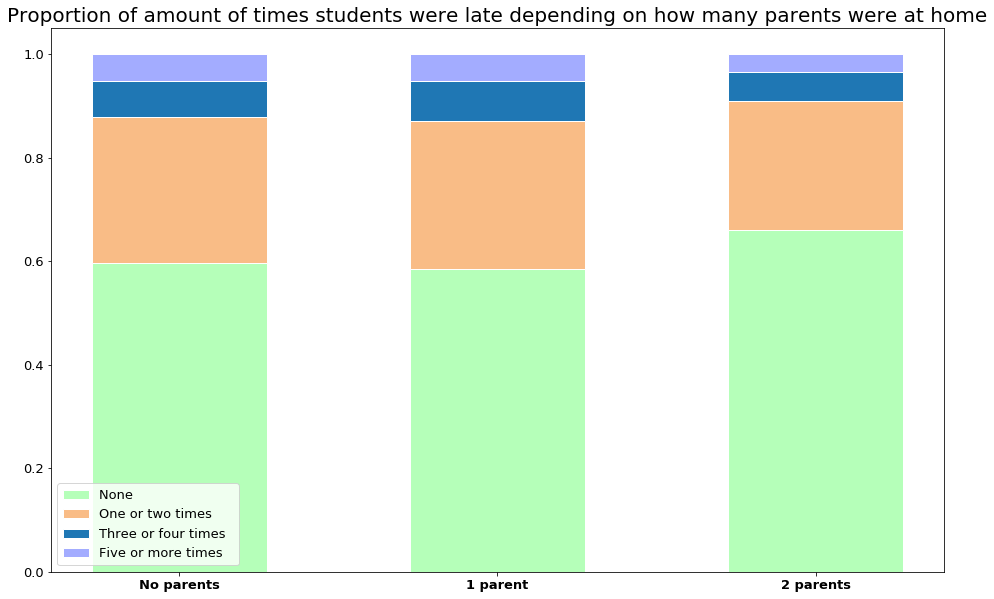

In [38]:
# Create Figure
plt.figure(figsize=(16,10))
# Create bars
r = [0,1,2]
# Create starting bar location
bars_1 = np.add(bar_percentages.iloc[0], bar_percentages.iloc[1]).tolist()
bars_2 = np.add(bar_percentages.iloc[2], bars_1).tolist()
# Names of columns
names = ['No parents','1 parent','2 parents']
barWidth = 0.55
# Create green Bars
plt.bar(r, bar_percentages.iloc[0], color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, bar_percentages.iloc[1], bottom=bar_percentages.iloc[0], color='#f9bc86', edgecolor='white', width=barWidth)
# Create dark blue Bars
plt.bar(r, bar_percentages.iloc[2], bottom=bars_1, edgecolor='white', width=barWidth)
# Create purple Bars
plt.bar(r, bar_percentages.iloc[3], bottom=bars_2, color='#a3acff', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.legend(bar_percentages.index)
plt.title('Proportion of amount of times students were late depending on how many parents were at home', fontsize=20)
# Show graphic
plt.show();

### **Analysis:**

Children having two parents at home had the best truancy rate. Above 60% of children, with both biological parents at home, have never been late to school. Children with one parent living at home had the worst truancy rate with more than 40% being late at least once. Children with no parents at home had a very similar truancy distribution to those with 1 parent at home. 

Children with both parents at home also had the least amount of children that were late 5 or more times. 



Now we have explored the idea of if children with both biological parents are more susceptible to being truant. Do children with both parents at home have better scores in maths, reading and science? 

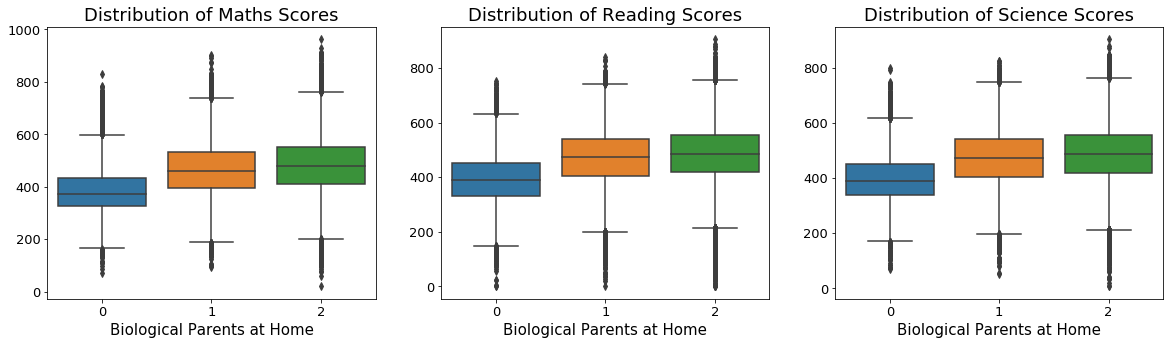

In [39]:
# Create figure 
plt.figure(figsize = [20, 5])
# Set color
base_color = sb.color_palette()[0];

# left plot: box plot of maths score
plt.subplot(1, 3, 1)
# Choose data
ax = sb.boxplot(x='parents_at_home', y='PV1MATH', data=df_full_q2)
# Set x label
plt.xlabel('Biological Parents at Home', fontsize=15)
# Remove y label
plt.ylabel('')
# Set title
plt.title('Distribution of Maths Scores', fontsize=18);

# middle plot: box plot of reading scores
plt.subplot(1, 3, 2)
ax = sb.boxplot(x='parents_at_home', y='PV1READ', data=df_full_q2)
plt.xlabel('Biological Parents at Home', fontsize=15)
plt.ylabel('')
plt.title('Distribution of Reading Scores', fontsize=18);

# right plot: box plot of science scores
plt.subplot(1, 3, 3)
ax = sb.boxplot(x='parents_at_home', y='PV1SCIE', data=df_full_q2)
plt.xlabel('Biological Parents at Home', fontsize=15)
plt.ylabel('')
plt.title('Distribution of Science Scores', fontsize=18);

**Analysis:**

From the three box plot we can see that having 2 biological parents at home has a positive affect on the average scores for mathematics (PV1MATH), science (PV1SCIE) and reading (PV1READ). Not having any biological parents at home has a detrimentral affect on the mean scores for all subjects but also children with no parents at home had the smallest range. On the contrary, parents with both parents at home had the largest range of scores. 

So we've determined that's there's a relationship between the amount of parents at home and scores, and amount of parents at home and truancy, but is there a similar relationship between truancy and scores?

In [40]:
# Check values of truancy
df_full['ST09Q01'].value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: ST09Q01, dtype: int64

In [41]:
# Split dataframe into two 
# One for children who are never late and one for children who have been late once or more
never_late = df_full['ST09Q01'].value_counts().index[:1]
late = df_full['ST09Q01'].value_counts().index[1:4]
df_late = df_full.loc[df_full['ST09Q01'].isin(late)]
df_never_late = df_full.loc[df_full['ST09Q01'].isin(never_late)]

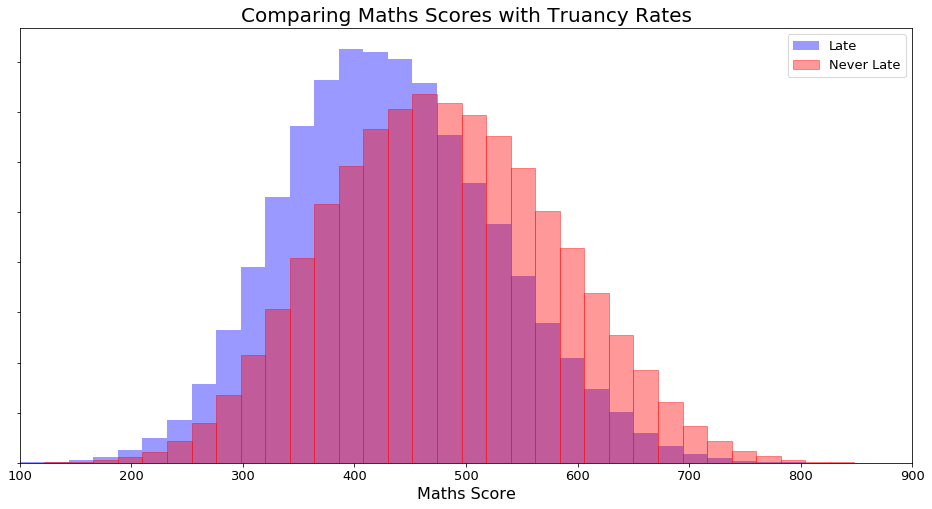

In [42]:
# Create figure
fig = plt.figure(figsize = [16, 8])
ax = fig.add_subplot(111)

# Add histogram settings for children who are late
ax.hist(data = df_late, x = df_late['PV1MATH'], bins = np.arange(100, 1000, 22), density=True, edgecolor='None', alpha = 0.4, color= 'b')
# Add histogram settings for children who are never late
ax.hist(data = df_never_late, x = df_never_late['PV1MATH'], bins = np.arange(100, 1000, 22), density=True, edgecolor='r', alpha = 0.4, color= 'r')
# Add legend
ax.legend(['Late', 'Never Late'])
# Remove y axis values
ax.set_yticklabels([])
# Set x axis limits
plt.xlim((100, 900))
# Add title
plt.title('Comparing Maths Scores with Truancy Rates', fontsize=20)
# Add x axis label
plt.xlabel('Maths Score', fontsize=16)
plt.show();


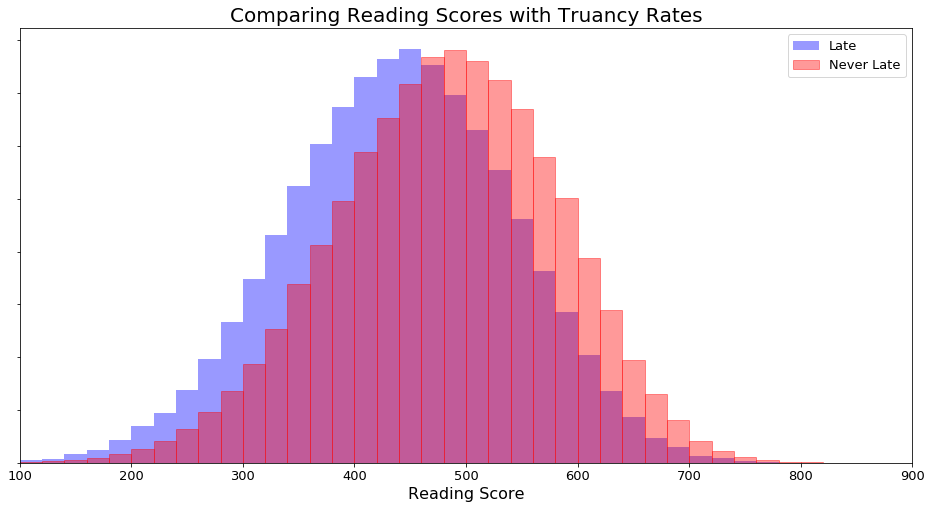

In [43]:
# Create figure
fig = plt.figure(figsize = [16, 8])
ax = fig.add_subplot(111)

# Add histogram settings for children who are late
ax.hist(data = df_late, x = df_late['PV1READ'], bins = np.arange(100, 1000, 20), density=True, edgecolor='None', alpha = 0.4, color= 'b')
# Add histogram settings for children who are never late
ax.hist(data = df_never_late, x = df_never_late['PV1READ'], bins = np.arange(100, 1000, 20), density=True, edgecolor='r', alpha = 0.4, color= 'r')
# Add legend
ax.legend(['Late', 'Never Late'])
# Remove y axis values
ax.set_yticklabels([])
# Set x axis limits
plt.xlim((100, 900))
# Add title
plt.title('Comparing Reading Scores with Truancy Rates', fontsize=20)
# Add x axis label
plt.xlabel('Reading Score', fontsize=16)
plt.show();

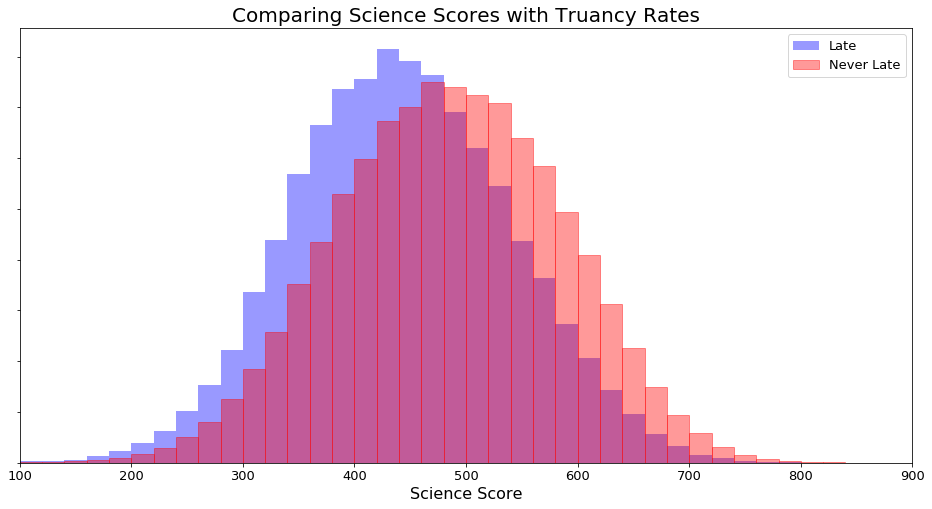

In [44]:
# Create figure
fig = plt.figure(figsize = [16, 8])
ax = fig.add_subplot(111)

# Add histogram settings for children who are late
ax.hist(data = df_late, x = df_late['PV1SCIE'], bins = np.arange(100, 1000, 20), density=True, edgecolor='None', alpha = 0.4, color= 'b')
# Add histogram settings for children who are never late
ax.hist(data = df_never_late, x = df_never_late['PV1SCIE'], bins = np.arange(100, 1000, 20), density=True, edgecolor='r', alpha = 0.4, color= 'r')
# Add legend
ax.legend(['Late', 'Never Late'])
# Remove y axis values
ax.set_yticklabels([])
# Set x axis limits
plt.xlim((100, 900))
# Add title
plt.title('Comparing Science Scores with Truancy Rates', fontsize=20)
# Add x axis label
plt.xlabel('Science Score', fontsize=16)
plt.show();

**Analysis:**

Children who are never late to school seem to have normally distributed scores. Children who have been late to school once or more have unimodally distributed scores but have distinctly lower averages. Whilst the average scores of children who are never late are higher, both groups in all subjects seem to have approximately similar maximum and minimum values. 

My sister is a German and Business graduate but I am a mathematics and physics graduate and I have often thought that although our degrees are not really comparable did the presence of having a sibling increase my mathematical ability. 

In [45]:
# View value counts 
df_full['ST11Q03'].value_counts()

Yes    245262
No     154814
Name: ST11Q03, dtype: int64

In [46]:
# View value counts 
df_full['ST11Q04'].value_counts()

Yes    223061
No     167707
Name: ST11Q04, dtype: int64

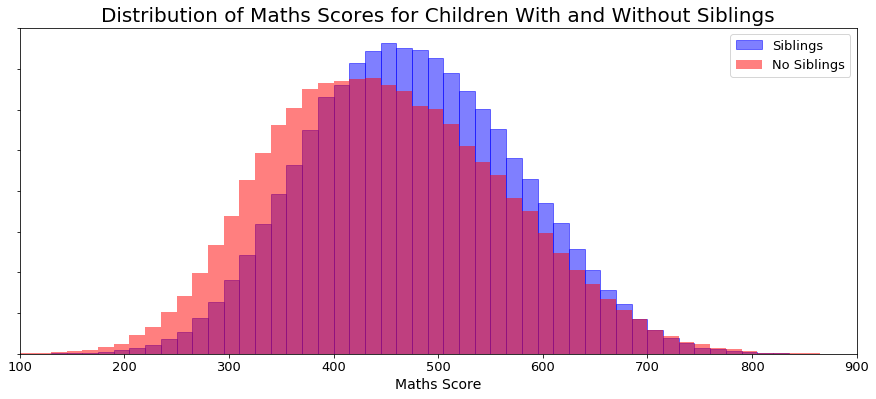

In [85]:
# Create figure
fig = plt.figure(figsize = [15, 6])
ax = fig.add_subplot(111)
# Add sibling data for maths score
ax.hist(data = df_w_siblings, x = df_w_siblings['PV1MATH'], bins = np.arange(100, 1000, 15), density=True, edgecolor='b', alpha = 0.5, color= 'b')
# Add no sibling data for maths score
ax.hist(data = df_wo_siblings, x = df_wo_siblings['PV1MATH'], bins = np.arange(100, 1000, 15), density=True, edgecolor='None', alpha = 0.5, color= 'r')
# Remove y tick labels
ax.set_yticklabels([])
# Set x axis limit
plt.xlim((100, 900))
# Set x label
plt.xlabel('Maths Score', fontsize=14)
# Create title
plt.title('Distribution of Maths Scores for Children With and Without Siblings', fontsize=20)
# Create legend
ax.legend(['Siblings', 'No Siblings'])
plt.show();

**Analysis:**

Similar to the affect trauncy rate has on mathematical ability, having siblings makes a similar difference. Children with at least 1 siblings have a higher average maths score than those children without siblings. Both distributions seem to have similar maximums and minimums however. So thanks sis for the help. 

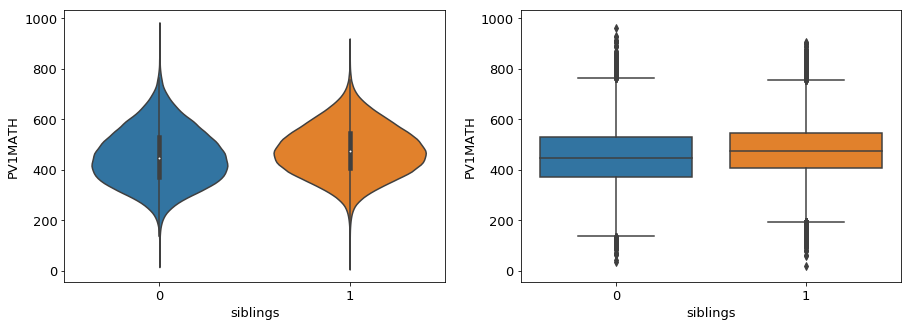

In [48]:
# Create figure
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_full, x = df_full['siblings'], y = 'PV1MATH')

# center plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_full, x = df_full['siblings'], y = 'PV1MATH')
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

So it's acedemically better to have siblings and never be late but are the individual subjects related to each other? I think it's safe to assume that there will certainly be a correlation between maths and science scores as they are vey similar subjects but what's the relationship between maths scores and reading scores? 

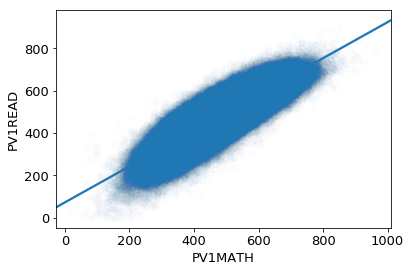

In [49]:
# Plot maths scores against reading scores
sb.regplot(data = df_full, x = 'PV1MATH', y = 'PV1READ', 
           x_jitter = 0.2, y_jitter = 0.2, 
           scatter_kws = {'alpha' : 1/100});

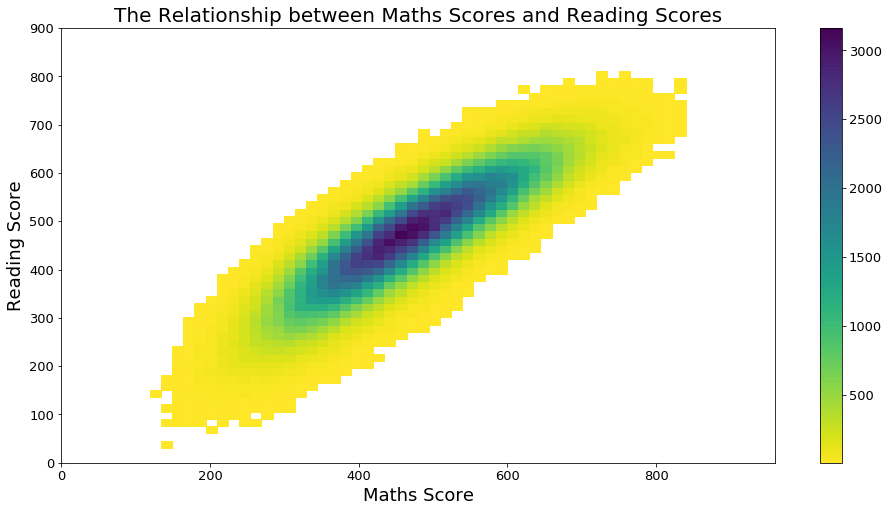

In [50]:
# Create bins for each varibale
bin_PV1MATH = np.arange(0, df_full['PV1MATH'].max(), 15)
bin_PV2READ   = np.arange(0, df_full['PV1READ'].max(), 15)

# Create figure
plt.figure(figsize = [16, 8])
# Create heat map for each variable using bins
h2d = plt.hist2d(data = df_full, x = 'PV1MATH', y = 'PV1READ', 
          bins = [bin_PV1MATH, bin_PV2READ], cmap = 'viridis_r', cmin = 5, alpha = 0.99)
# Plot x label
plt.xlabel('Maths Score', fontsize=18)
# Plot y label
plt.ylabel('Reading Score', fontsize=18)
# Plot title
plt.title('The Relationship between Maths Scores and Reading Scores', fontsize=20)
# Plot colour bar
plt.colorbar();

**Analysis:**

There is a strong relationship between mathematical ability and reading ability. The relationship is also positive. The majority of scores, represented by the darker area of the graph, lies very centrally in the distribution with mathematic scores between 400 and 600 and similar reading scores. At the top end of the major part of the spectrum there are children with maths and reading scores of 800.

### Multivariate Analysis

From our last visualisation we saw that there's a strong correlation between maths and reading scores and that the most popular scores for both variables were inbetween 400 and 600 but what happens if we introduce a third nominal variable such as the amount of parents at home?

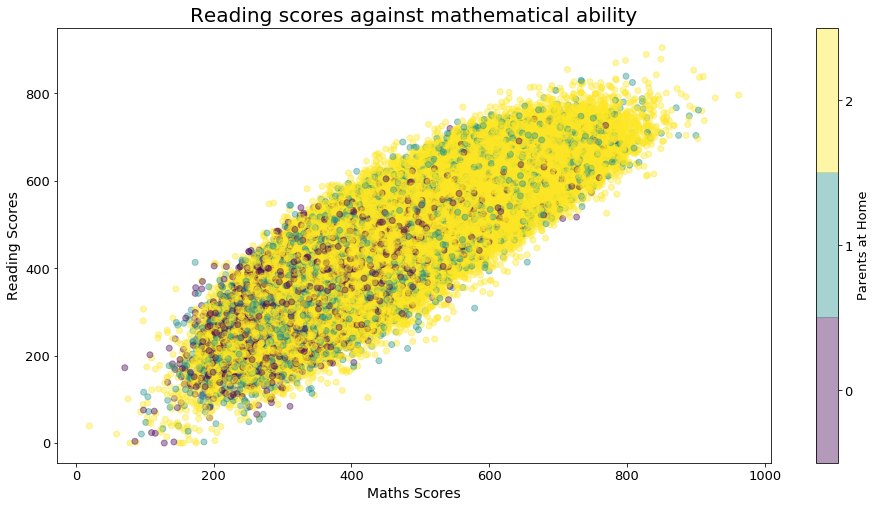

In [51]:
# Create figure
plt.figure(figsize = [16, 8])
# Plot scatter using data
plt.scatter(data = df_full_q2, x = 'PV1MATH', y = 'PV1READ', c = 'parents_at_home', cmap=plt.cm.get_cmap('viridis', 3), alpha = 0.4)
# Plot the title
plt.title('Reading scores against mathematical ability', fontsize=20)
# Plot y label
plt.ylabel('Reading Scores', fontsize=14)
# Plot x label
plt.xlabel('Maths Scores', fontsize=14)
# Create colour legend
plt.colorbar(ticks=range(3), label='Parents at Home')
# Set limits of ticks on colour bar
plt.clim(-0.5, 2.5);

**Analysis:**

From the bivariate analysis we found that there is a strong positive correlation between reading scores and mathematical ability. Adding in the amount of parents at home as a colour dependent variable shows that the children with no parents at home, represented by the darker circles, appear to clump in the bottom left portion of the distribution which corresponds to lower readings and mathematics scores. The top end of the spectrum is made up mainly children with two parents. 

After looking into the relationship between reading scores, maths scores and parents at home. What is the relationship between reading, scores, maths scores and truancy? 

In [52]:
import statsmodels.api as sm

In [53]:
df_late['late'] = 1 
df_never_late['late'] = 0
frames = [df_late, df_never_late]
df_full_mv = pd.concat(frames)
df_full_mv.head(5)

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,siblings,late
9,10,Albania,80000,ALB0005,Non-OECD,Albania,2,10,10,1.0,...,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13,1,1
14,15,Albania,80000,ALB0005,Non-OECD,Albania,2,15,10,1.0,...,3.5254,11.8663,11.8663,11.8663,74,2,0.1746,22NOV13,1,1
16,17,Albania,80000,ALB0005,Non-OECD,Albania,2,17,10,1.0,...,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13,1,1
51,52,Albania,80000,ALB0007,Non-OECD,Albania,3,52,10,1.0,...,15.0045,15.0045,15.0811,5.0015,27,1,0.2317,22NOV13,0,1
54,55,Albania,80000,ALB0007,Non-OECD,Albania,3,55,9,1.0,...,12.5175,12.5175,12.5175,4.1725,27,1,0.1965,22NOV13,1,1


In [54]:
X_late = df_full_mv[df_full_mv['late'] == 1]['PV1MATH']
Y_late = df_full_mv[df_full_mv['late'] == 1]['PV1READ']

results_late = sm.OLS(Y_late,sm.add_constant(X_late)).fit()
results_late.summary()

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 2.190e+05
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:50:56   Log-Likelihood:            -5.0591e+05
No. Observations:               93133   AIC:                         1.012e+06
Df Residuals:                   93131   BIC:                         1.012e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9495      0.852     58.644      0.000      48.280      51.619
PV1MATH        0.8990      0.002    467.996      0.000       0.895       0.903
==============================================================================
Omnibus:                      475.782   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.367
Skew:                          -0.161   Prob(JB):                    7.36e-108
Kurtosis:                       3.155   Cond. No.                     2.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
X_never_late = df_full_mv[df_full_mv['late'] == 0]['PV1MATH']
Y_never_late = df_full_mv[df_full_mv['late'] == 0]['PV1READ']

results_never_late = sm.OLS(Y_never_late,sm.add_constant(X_never_late)).fit()
results_never_late.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 1.059e+06
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:51:55   Log-Likelihood:            -2.0718e+06
No. Observations:              385998   AIC:                         4.144e+06
Df Residuals:                  385996   BIC:                         4.144e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3026      0.397    204.592      0.000      80.524      82.081
PV1MATH        0.8341      0.001   1029.319      0.000       0.833       0.836
==============================================================================
Omnibus:                     1782.903   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1929.332
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                       3.215   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

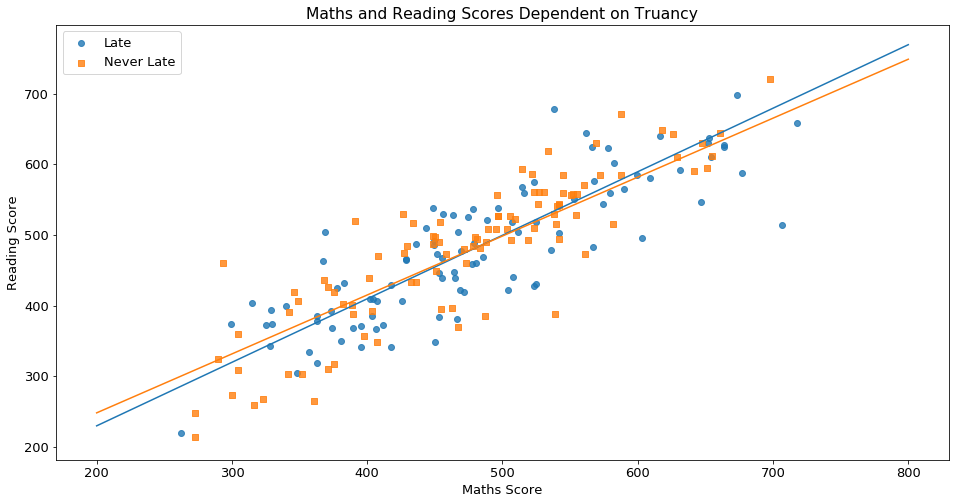

In [79]:
truancy_markers = [["1", 'o'],
                  ["0", 's']]
plt.figure(figsize = [16, 8])
for lateness, truancy in truancy_markers:
    df_full_plot = df_full_mv[df_full_mv['late'] == lateness]
    X_plot = plt.scatter(data = df_full_mv.sample(n=100), y = 'PV1READ', x = 'PV1MATH', marker = truancy, alpha = 0.8)

plt.legend(['Late','Never Late'])
plt.plot([200, 800], [229.7495, 769.1495])
plt.plot([200, 800], [248.1226, 748.5826])
plt.xlabel('Maths Score', fontsize=14)
plt.ylabel('Reading Score', fontsize=14)
plt.title('Maths and Reading Scores Dependent on Truancy', fontsize=20);



**Analysis:**

From the sample of 100 children, it is not clear that truancy is a key indicator of maths and reading scores. For lower mathematics scores, being late seems to have a negative affect on reading score. However, at higher mathematics scores, it may be slightly beneficial to reading ability if the child is sometimes late. 

I know having a sister, who later graduated in Business and German at home helped me tremendously with my German homework but was it also beneficial to my English score?

In [57]:
df_w_siblings.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,siblings
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,1
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,1
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,1
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,1
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,1


In [58]:
df_wo_siblings.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,siblings
8,9,Albania,80000,ALB0006,Non-OECD,Albania,1,9,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,0
10,11,Albania,80000,ALB0005,Non-OECD,Albania,2,11,10,1.0,...,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13,0
12,13,Albania,80000,ALB0005,Non-OECD,Albania,2,13,10,1.0,...,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13,0
15,16,Albania,80000,ALB0005,Non-OECD,Albania,2,16,10,1.0,...,11.8663,3.5254,11.8663,11.8663,11.8663,74,2,0.1746,22NOV13,0
23,24,Albania,80000,ALB0005,Non-OECD,Albania,2,24,10,1.0,...,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13,0


In [59]:
X_w_sibling = df_w_siblings['PV1MATH']
Y_w_sibling = df_w_siblings['PV1READ']

results_w_siblings = sm.OLS(Y_w_sibling,sm.add_constant(X_w_sibling)).fit()
results_w_siblings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 9.221e+05
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:52:04   Log-Likelihood:            -1.9223e+06
No. Observations:              357633   AIC:                         3.845e+06
Df Residuals:                  357631   BIC:                         3.845e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0730      0.426    183.373      0.000      77.239      78.908
PV1MATH        0.8407      0.001    960.265      0.000       0.839       0.842
==============================================================================
Omnibus:                     2051.709   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2202.925
Skew:                          -0.158   Prob(JB):                         0.00
Kurtosis:                       3.220   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
df_wo_siblings['siblings'].value_counts()

0    127857
Name: siblings, dtype: int64

In [80]:
X_wo_sibling = df_wo_siblings['PV1MATH']
Y_wo_sibling = df_wo_siblings['PV1READ']

results_wo_siblings = sm.OLS(Y_wo_sibling,sm.add_constant(X_wo_sibling)).fit()
results_wo_siblings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 4.016e+05
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:06:16   Log-Likelihood:            -6.9190e+05
No. Observations:              127857   AIC:                         1.384e+06
Df Residuals:                  127855   BIC:                         1.384e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.7483      0.638     96.749      0.000      60.497      62.999
PV1MATH        0.8696      0.001    633.718      0.000       0.867       0.872
==============================================================================
Omnibus:                      516.400   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.523
Skew:                          -0.122   Prob(JB):                    7.07e-123
Kurtosis:                       3.214   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
df_full.siblings.value_counts()

1    357633
0    127857
Name: siblings, dtype: int64

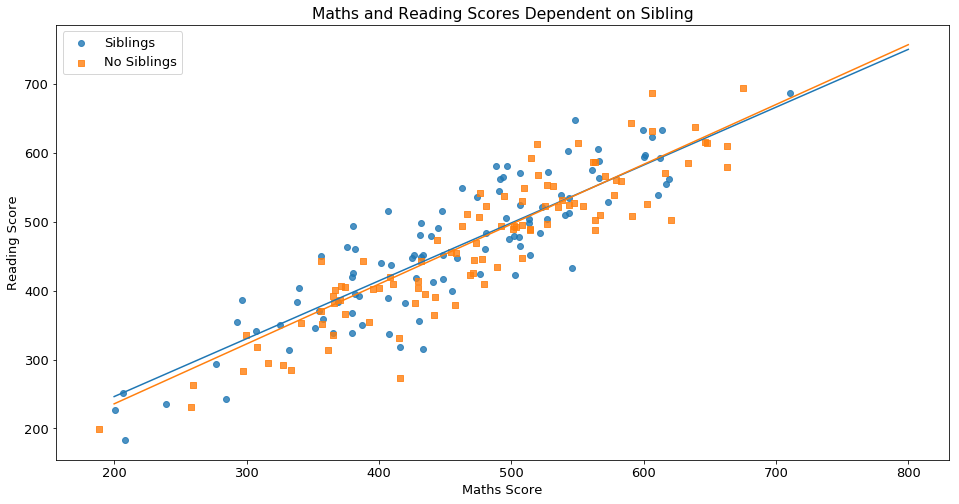

In [74]:
sibling_markers = [["1", 'o'],
                  ["0", 's']]

plt.figure(figsize = [16, 8])

for brothersandsisters, sibling in sibling_markers:
    df_full_plot = df_full[df_full['siblings'] == brothersandsisters]
    X_plot = plt.scatter(data = df_full.sample(n=100), y = 'PV1READ', x = 'PV1MATH', marker = sibling, alpha = 0.8)

plt.legend(['Siblings','No Siblings'])
plt.plot([200, 800], [246.213, 750.633])
plt.plot([200, 800], [235.6683, 757.4283])
plt.xlabel('Maths Score', fontsize=14)
plt.ylabel('Reading Score', fontsize=14)
plt.title('Maths and Reading Scores Dependent on Sibling', fontsize=20)
;

**Analysis:**

As we can see with the fitted regressional models, having siblings makes very little difference when comparing reading scores with mathematics scores. 

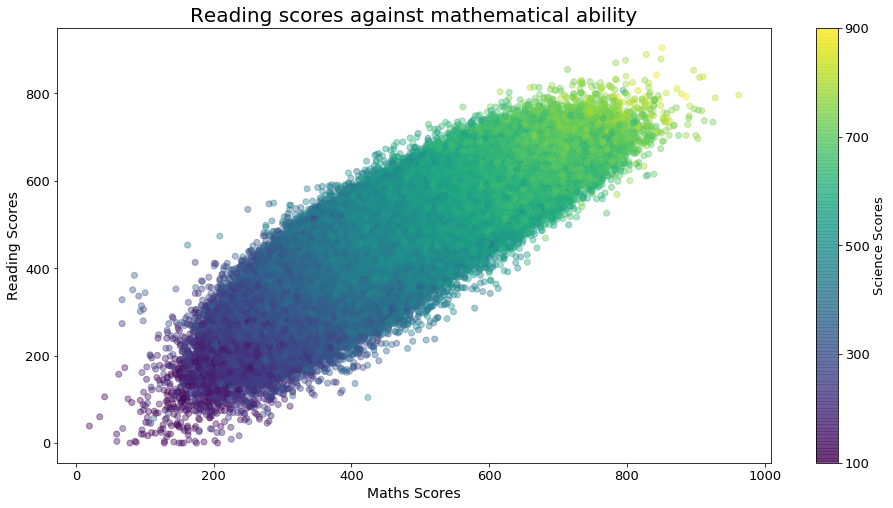

In [71]:
# Create figure
plt.figure(figsize = [16, 8])
# Plot scatter using data
plt.scatter(data = df_full, x = 'PV1MATH', y = 'PV1READ', c = 'PV1SCIE', cmap=plt.cm.get_cmap('viridis', 1000), alpha = 0.4)
# Plot the title
plt.title('Reading scores against mathematical ability', fontsize=20)
# Plot y label
plt.ylabel('Reading Scores', fontsize=14)
# Plot x label
plt.xlabel('Maths Scores', fontsize=14)
# Create colour legend
plt.colorbar(ticks=range(100, 901, 200), label='Science Scores')
# Set limits of ticks on colour bar
plt.clim(100, 900);

**Analysis:** 

As expected we can see that all of the 3 core subjects are related. If a student has a strong mathematical score for example, then they will probably have high science and reading scores also. 

### Conclusion

If I were to suggest a plan of action to raise the most acedemically successful children, I would suggest both parents to live at home, have multiple children and never be late. However these generalisations mean nothing to the individual family and are simply not practical in many situations. 

If I were to take this investigation further, I would try and deduce whether it's acdemically more beneficial to have sisters rather than brothers. 

Any questions would be gratefully welcomed. 


